# Notebook to analyse C-REMD data

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

## Define readin of distances, kappa, and dipoles

In [76]:
# data_path = '/localhome/kpaul/Lrep/beta_dipole_data/'
data_path = '/fileserver/pine/pine8/kpaul/beta_project/preprocessed_data/'

def concatenate_distances(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_diss = []
    
    for i in random_states:
        for s in chunks:
            L_dis = np.load(data_path + '/%s%i_r%i_beta__%i_dis.npy' % (core,id,i,s))
            L_dis = L_dis[rep_indices]
            L_diss.append(L_dis)

    L_diss = np.concatenate(L_diss)
    return L_diss

def concatenate_kappa(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_kappas = []
    
    for i in random_states:
        for s in chunks:
            L_kappa = np.load(data_path + '/%s%i_r%i_beta__%i_kappa.npy' % (core,id,i,s))
            L_kappa = L_kappa[rep_indices]
            L_kappas.append(L_kappa)

    L_kappas = np.concatenate(L_kappas)
    return L_kappas

def concatenate_dipoles(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_dipoles = []
    
    for i in random_states:
        for s in chunks:
            L_dipole = np.load(data_path + '%s%i_r%i_beta__%i_dipole.npy' % (core,id,i,s))
            L_dipole = L_dipole[rep_indices]
            L_dipoles.append(L_dipole)

    L_dipoles = np.concatenate(L_dipoles)

    # Dipoles were calculated without unit conversion, to be in line with the QM Classical calculations convert here
    alpha_factor = 0.148 * 3.1 / 0.529 / 100 # alpha 3.1 into Angstrom**3; Angstrom**1 into atomic radii; from nm into Angstrom
    L_dipoles = L_dipoles * alpha_factor

    return L_dipoles

## Read in data for specific Replica

In [77]:
# 5 independent random states are simulated
random = [0,1,2,3,4]

# The simulation consists of 50 chunks of 10ns each the first 100 are taken as equilibration
chunks = [i + 10 for i in range(40)]

# 16 replicas are simulated
replicas = 16

# Each replica is simulated for 20ps (10000 steps) with a write out frequency of a 1000, each replica consists of 10 frames in a row
per_rep = 10

# Each replica is simulated for 10ns at 10frames per it that gives 500 blocks 
step_range = 500

# Which replica to look at 
replica = 12

# Calculates indices for each replica -> chunks of 10 frames every 16 repeats
rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]

# The data is preprocessed and divided in the 3 important contributions distances, kappas and dipoles
dis0 = concatenate_distances(0,random,chunks,rep_indices,core='beta_id')
kappa0 = concatenate_kappa(0,random,chunks,rep_indices,core='beta_id')
dipole0 = concatenate_dipoles(0,random,chunks,rep_indices,core='beta_id')
dis1 = concatenate_distances(1,random,chunks,rep_indices,core='beta_id')
kappa1 = concatenate_kappa(1,random,chunks,rep_indices,core='beta_id')
dipole1 = concatenate_dipoles(1,random,chunks,rep_indices,core='beta_id')
dis2 = concatenate_distances(2,random,chunks,rep_indices,core='beta_id')
kappa2 = concatenate_kappa(2,random,chunks,rep_indices,core='beta_id')
dipole2 = concatenate_dipoles(2,random,chunks,rep_indices,core='beta_id')
# dis3 = concatenate_distances(3,random,chunks,rep_indices,core='beta_id')
# kappa3 = concatenate_kappa(3,random,chunks,rep_indices,core='beta_id')
# dipole3 = concatenate_dipoles(3,random,chunks,rep_indices,core='beta_id')

#### Setup dictionary

In [78]:
dis_dict = {'b0':dis0,'b1':dis1,'b2':dis2}
kappa_dict = {'b0':kappa0,'b1':kappa1,'b2':kappa2}
dipole_dict = {'b0':dipole0,'b1':dipole1,'b2':dipole2}

linker_dic = {'b0':'2+','b1':'3+','b2':'4+'}
linker_colors = {'b0':'Blues','b1':'Oranges','b2':'Greens'}

#### Plot distance distributions

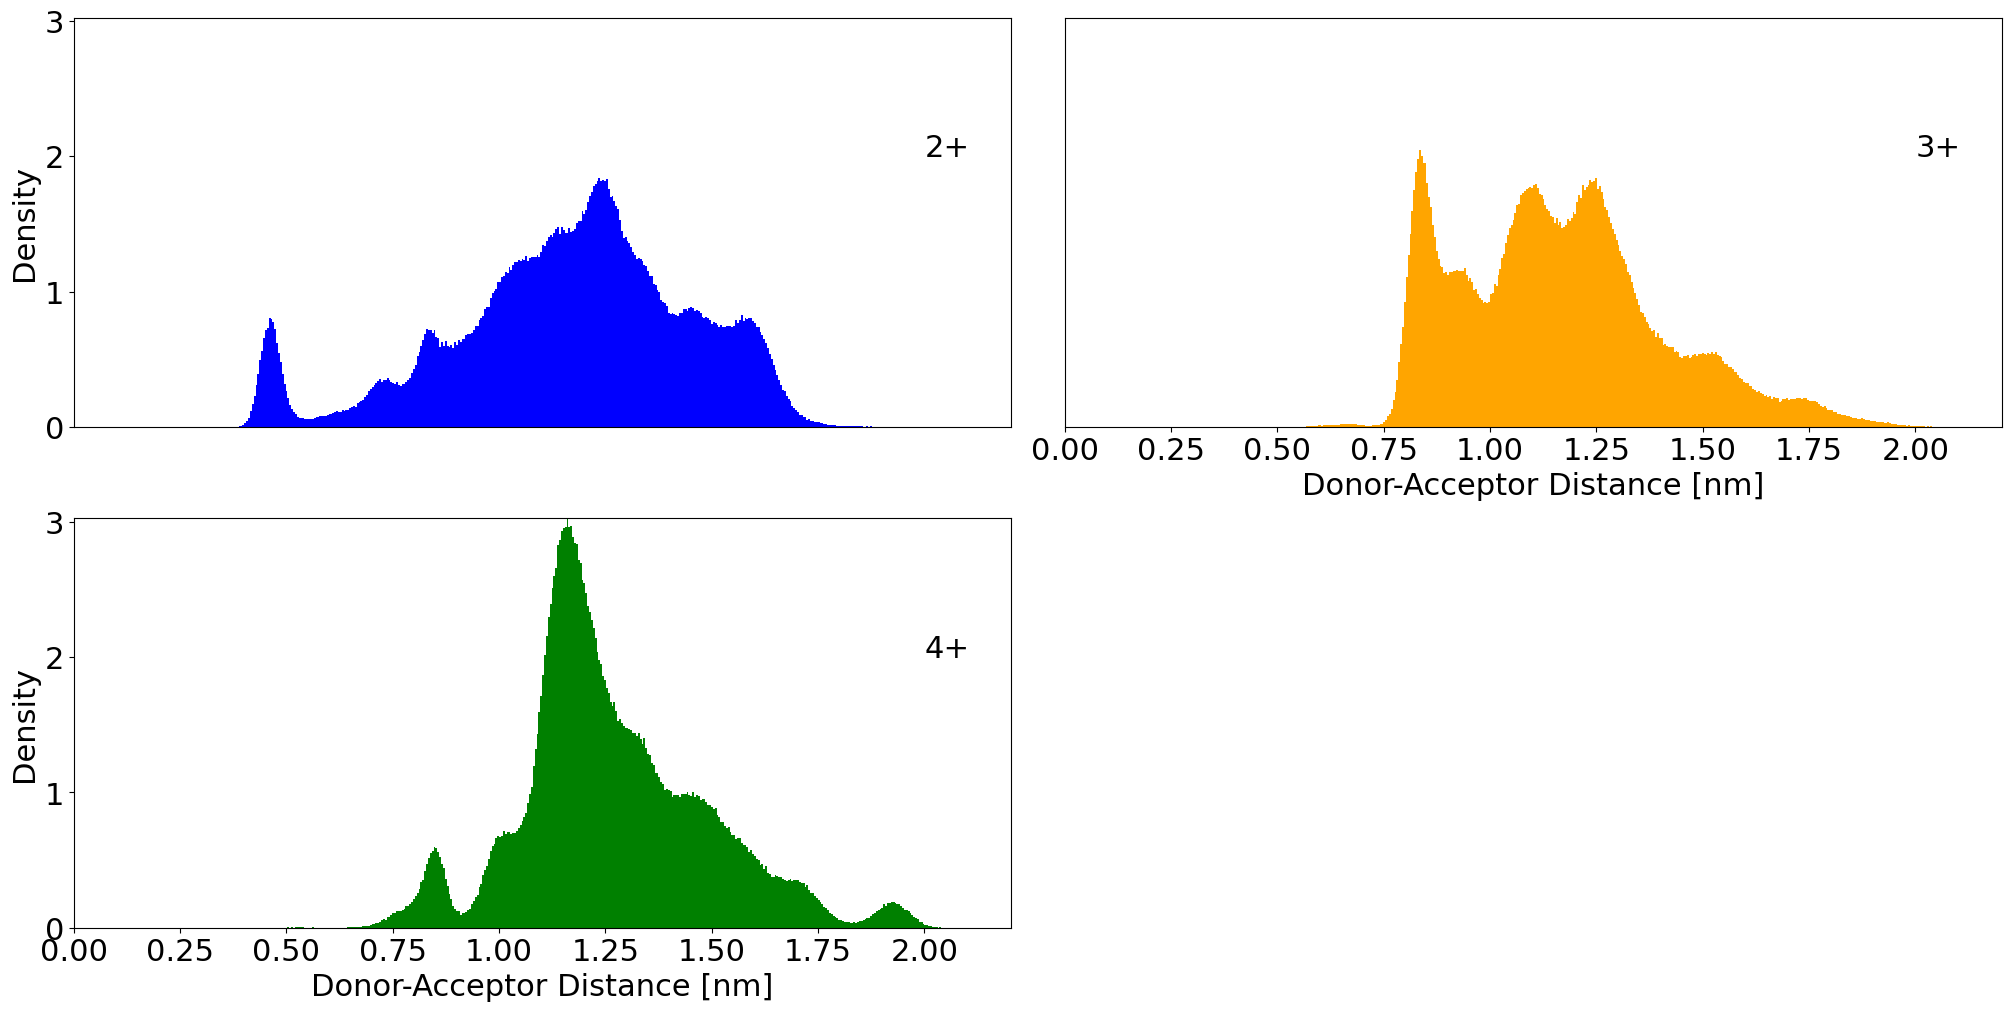

In [79]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["b0", "b1"],
        ["b2", "BLANK"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
for l in axd.keys():
    m = np.max(dis_dict[l])
    ms.append(m)
m = np.max(ms)

histms = []
for l in axd.keys():

    hist_ob = axd[l].hist(np.array(dis_dict[l]),bins=500,color=linker_colors[l].split('s')[0],density=True,alpha=1,range=[0,m])
    histms.append(np.max(hist_ob[0]))
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Density')
    axd[l].text(2,2,'%s' % linker_dic[l])

hm = np.max(histms)
for l in axd.keys():
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,hm])

axd['b0'].get_xaxis().set_visible(False)
axd['b1'].get_yaxis().set_visible(False)

### Plot dipole distribution

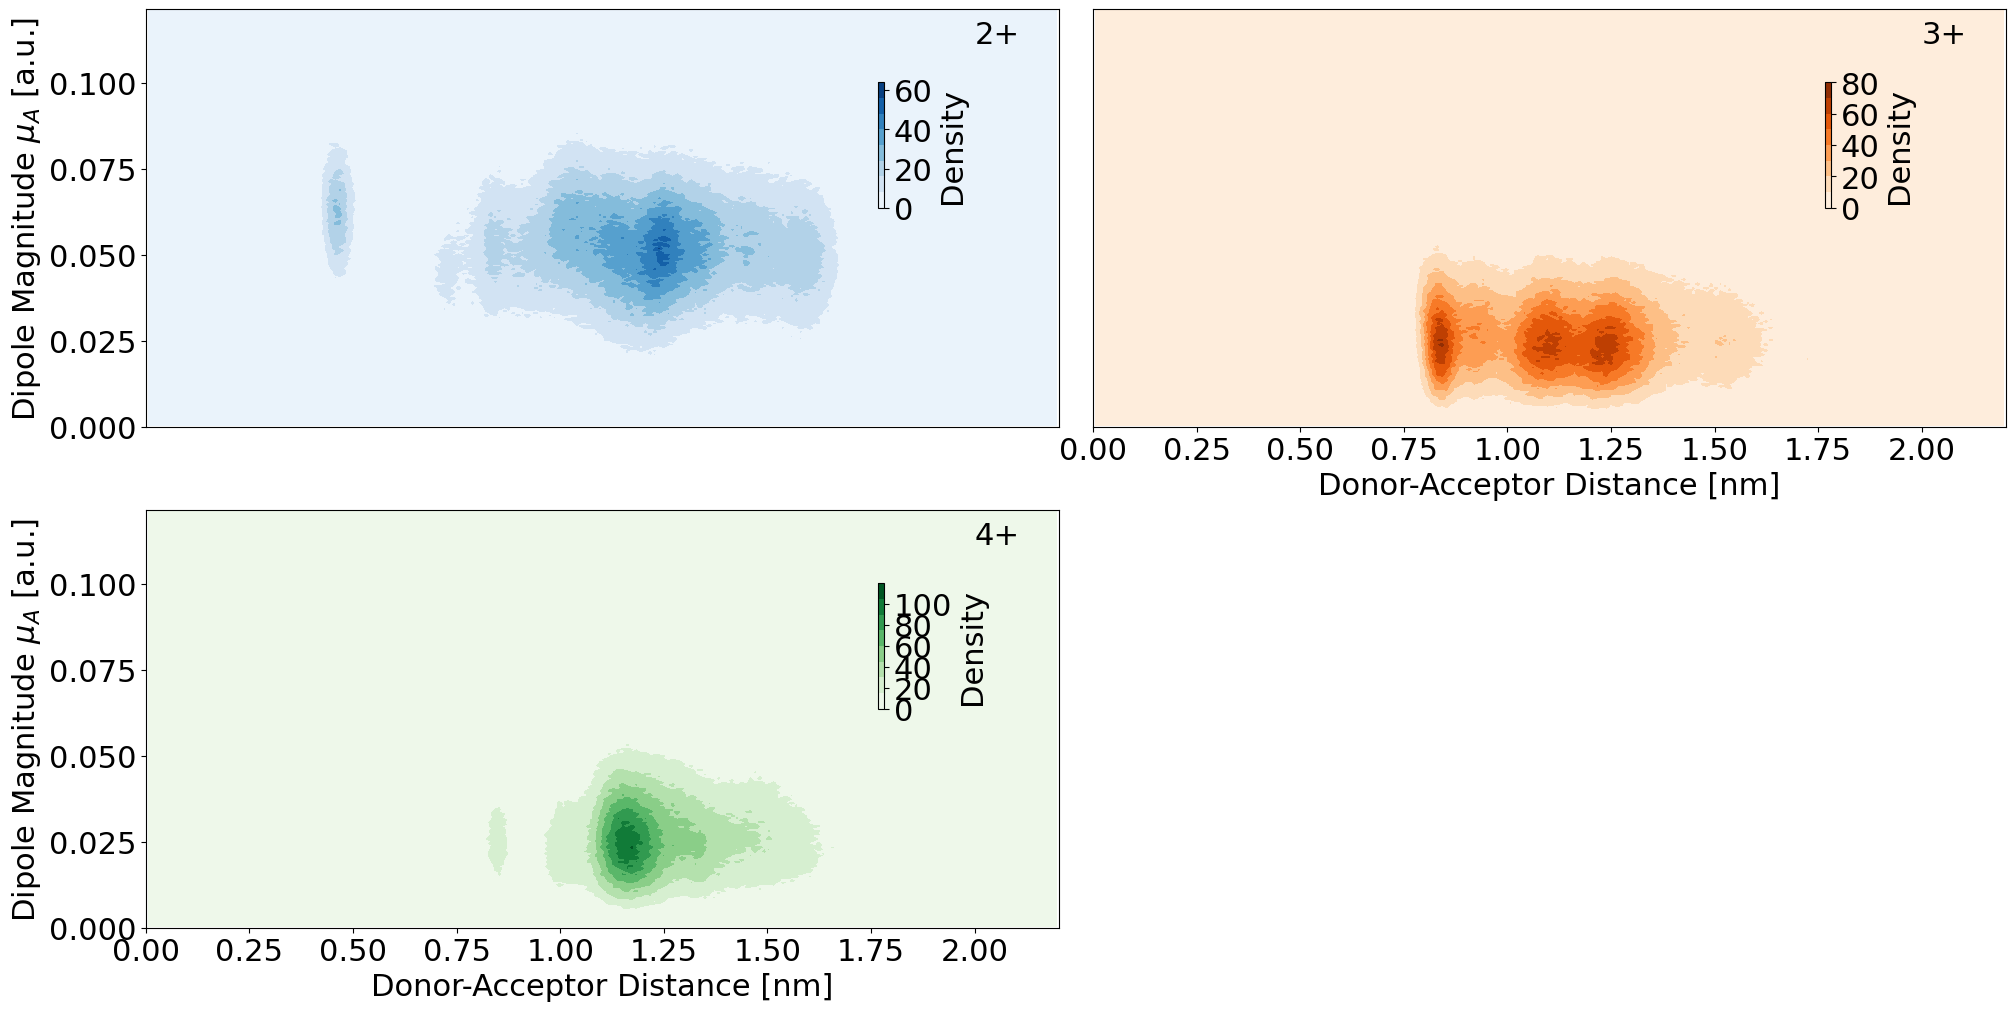

In [80]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["b0", "b1"],
        ["b2", "BLANK"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
ds = []
for l in axd.keys():
    d = np.max(dipole_dict[l])
    m = np.max(dis_dict[l])
    ms.append(m)
    ds.append(d)
m = np.max(ms)
d = np.max(ds)


for l in axd.keys():
    z, xedge, yedge = np.histogram2d(np.array(dis_dict[l]), np.linalg.norm(dipole_dict[l],axis=1),density=True,bins=200,range=[[0,m],[0,d]])
    x = 0.5 * (xedge[:-1] + xedge[1:])
    y = 0.5 * (yedge[:-1] + yedge[1:])
    z = z.T

    object = axd[l].contourf(x,y,z,cmap=linker_colors[l])
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,d])
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Dipole Magnitude $\mu_A$ [a.u.]')
    axd[l].text(2,d-1/100,'%s' % linker_dic[l])
    
    plt.colorbar(object,ax=[axd[l]],label=r'Density',orientation='vertical',shrink=0.3,anchor=(0.1,0.75),location='right',pad=-0.2,ticks = np.array([0,0.2,0.4,0.6,0.8,1])*100)


axd['b0'].get_xaxis().set_visible(False)
axd['b1'].get_yaxis().set_visible(False)


#### Calculate averages for mean of the squared dipole

In [81]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.mean((np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<1]))
    long_distances.append(np.mean((np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,3,3))
for i in range(3):
    for j in range(3):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]

#### Relative table below

In [82]:
rel_dis_matrics

array([[[1.        , 3.5334694 , 3.72938223],
        [0.28300797, 1.        , 1.05544489],
        [0.26814093, 0.94746775, 1.        ]],

       [[1.        , 3.48785535, 3.25921259],
        [0.28670914, 1.        , 0.93444603],
        [0.30682258, 1.07015276, 1.        ]]])

#### Plot Kappa distribution

/tmp/ipykernel_10877/2458484643.py:28: UserWarning: Log scale: values of z <= 0 have been masked
  object = axd[l].contourf(x,y,z,cmap=linker_colors[l],locator=ticker.LogLocator(2,numticks=10))


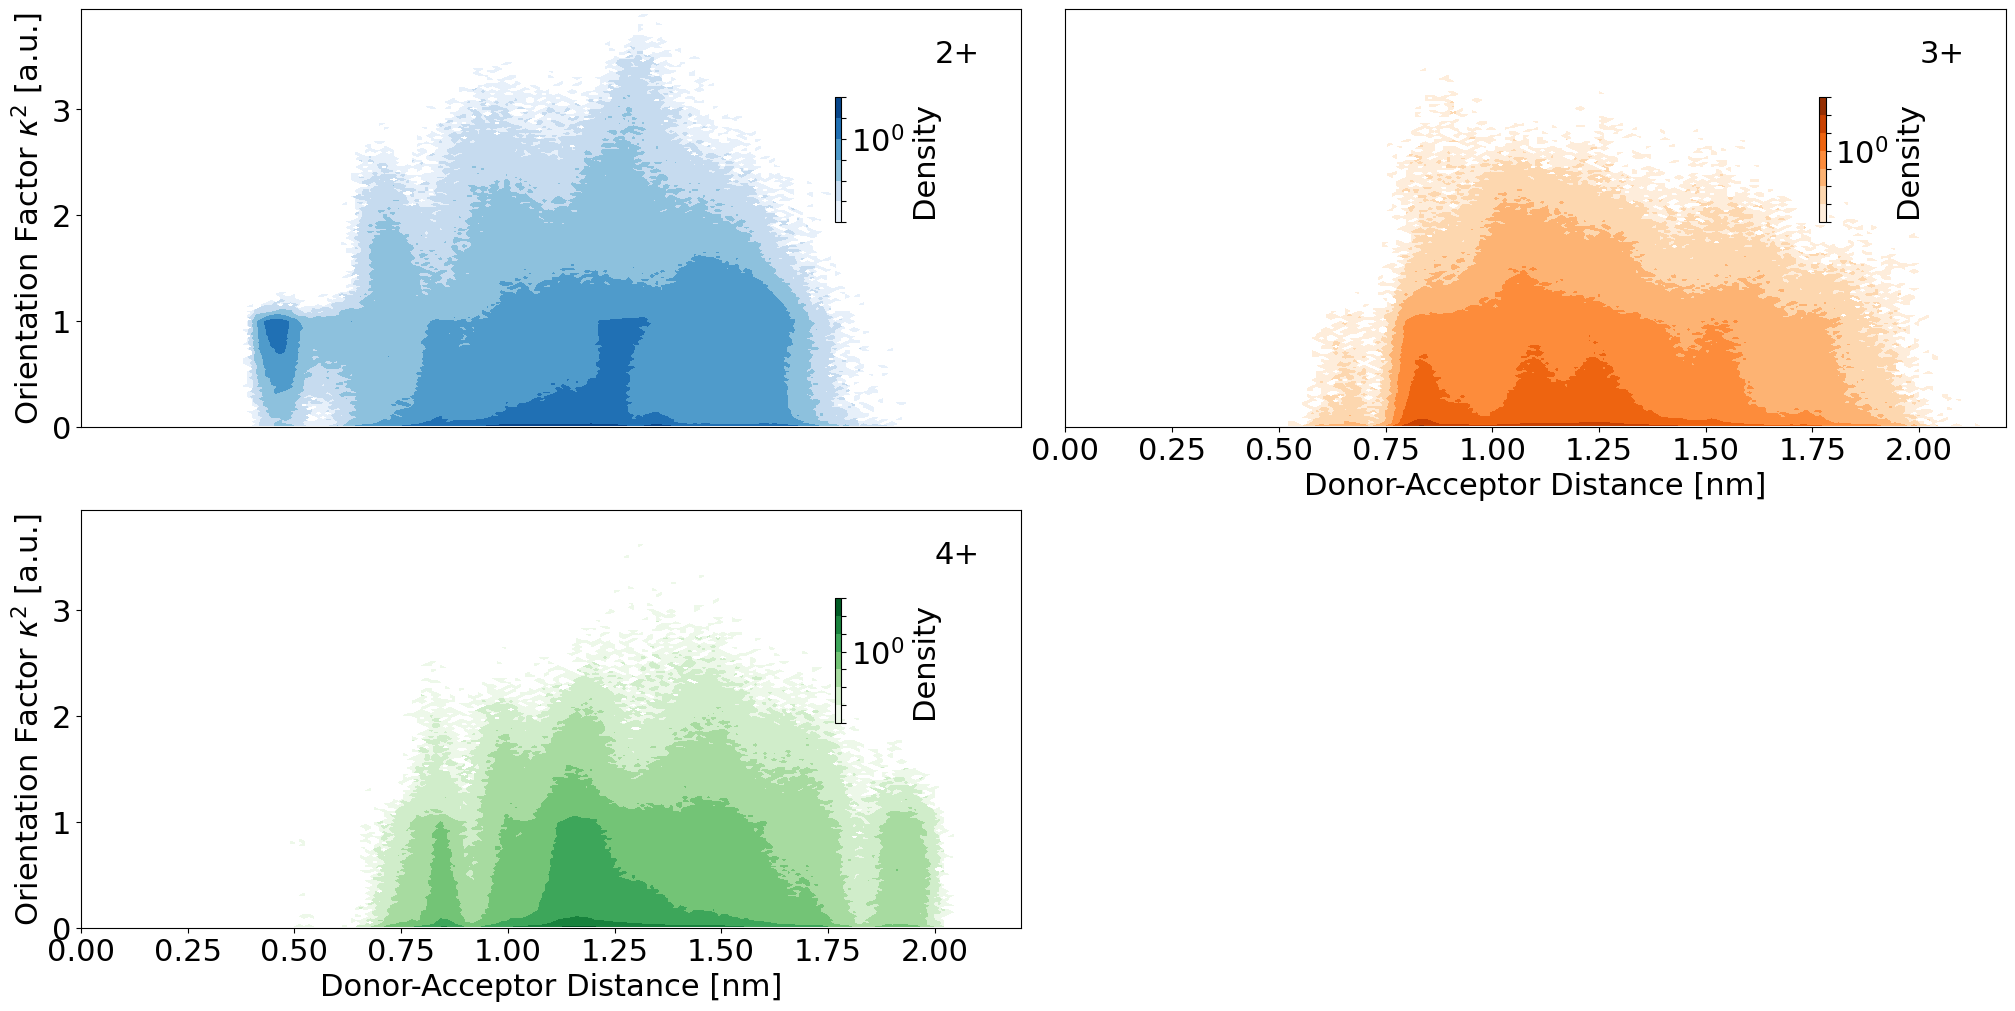

In [83]:
axd = plt.figure(constrained_layout=True).subplot_mosaic(
    [
        ["b0", "b1"],
        ["b2", "BLANK"],
    ],
    empty_sentinel="BLANK",
    gridspec_kw={"width_ratios": [1, 1],"height_ratios":[1,1]}
)

# get maxima
ms = []
ks = []
for l in axd.keys():
    k = np.nanmax(kappa_dict[l])
    m = np.nanmax(dis_dict[l])
    ms.append(m)
    ks.append(k)
m = np.max(ms)
k = np.max(ks)

for l in axd.keys():

    z, xedge, yedge = np.histogram2d(np.array(dis_dict[l]), kappa_dict[l],density=True,bins=200,range=[[0,m],[0,k]])
    x = 0.5 * (xedge[:-1] + xedge[1:])
    y = 0.5 * (yedge[:-1] + yedge[1:])
    z = z.T

    object = axd[l].contourf(x,y,z,cmap=linker_colors[l],locator=ticker.LogLocator(2,numticks=10))
    axd[l].set_xlim([0,m])
    axd[l].set_ylim([0,k])
    axd[l].set_xlabel('Donor-Acceptor Distance [nm]')
    axd[l].set_ylabel('Orientation Factor $\kappa^2$ [a.u.]')
    axd[l].text(2,k-0.5,'%s' % linker_dic[l])
    
    plt.colorbar(object,ax=[axd[l]],label=r'Density',orientation='vertical',shrink=0.3,anchor=(0.1,0.7),location='right',pad=-0.2)

axd['b0'].get_xaxis().set_visible(False)
axd['b1'].get_yaxis().set_visible(False)

#### Relative table below

In [84]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<1]))
    long_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,3,3))
for i in range(3):
    for j in range(3):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]
rel_dis_matrics

array([[[1.        , 1.56556774, 1.4640556 ],
        [0.63874591, 1.        , 0.93515953],
        [0.68303417, 1.06933626, 1.        ]],

       [[1.        , 1.48228109, 1.48916892],
        [0.67463588, 1.        , 1.00464678],
        [0.67151549, 0.99537471, 1.        ]]])

##### Net effect

In [85]:
short_distances = []
long_distances =[]

for l in linker_dic.keys():
    short_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<1]*(np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<1]))
    long_distances.append(np.nanmean(kappa_dict[l][dis_dict[l]<10]*(np.linalg.norm(dipole_dict[l],axis=1)**2)[dis_dict[l]<10]))

rel_dis_matrics = np.empty((2,3,3))
for i in range(3):
    for j in range(3):
        rel_dis_matrics[0,i,j] = short_distances[i]/short_distances[j]
        rel_dis_matrics[1,i,j] = long_distances[i]/long_distances[j]
rel_dis_matrics

array([[[1.        , 5.45081698, 5.38820337],
        [0.18345874, 1.        , 0.98851299],
        [0.18559062, 1.0116205 , 1.        ]],

       [[1.        , 5.31136332, 5.09545963],
        [0.18827558, 1.        , 0.95935061],
        [0.19625315, 1.04237178, 1.        ]]])

## Calculate the predicted Efficiencies

In [86]:
# Efficiencies are calculated assuming fast interconversions

def calculate_ef(dis,kappa,dipole,r0):
    
    dipole = dipole / (0.148 * 3.1 / 0.529 / 100)
    
    # note kappa is allready squared in order to calculated efficiently.
    fast_single = (kappa*np.linalg.norm(dipole,axis=1)**2*r0**6) / (dis**6)
    fast_avg = np.nanmean(fast_single)
    ef = 1 / (1 + 1/fast_avg)

    return ef

#### Calculated the efficiencies

In [87]:
efficiencies = np.empty((16,3,5))
efficiencies[:] = np.nan

chunks = [10 + i for i in range(40)]
# assume a r'0 of 0.7
ro_base = 0.7

# Average over the different random seeds
for replica in range(16):
    for id in range(3):
        for ra,random in enumerate([[0],[1],[2],[3],[4]]):
            rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]
            dis = concatenate_distances(id,random,chunks,rep_indices,core='beta_id')
            kappa = concatenate_kappa(id,random,chunks,rep_indices,core='beta_id')
            dipole = concatenate_dipoles(id,random,chunks,rep_indices,core='beta_id')
            efficiencies[replica,id,ra] = calculate_ef(dis,kappa,dipole,ro_base)

### print predicted efficiencies

In [88]:
np.mean(efficiencies[12],axis=1),np.std(efficiencies[12],axis=1)

(array([0.83480392, 0.34617536, 0.22528074]),
 array([0.17037414, 0.07153389, 0.05878451]))

### Show development of predicted Efficiencies

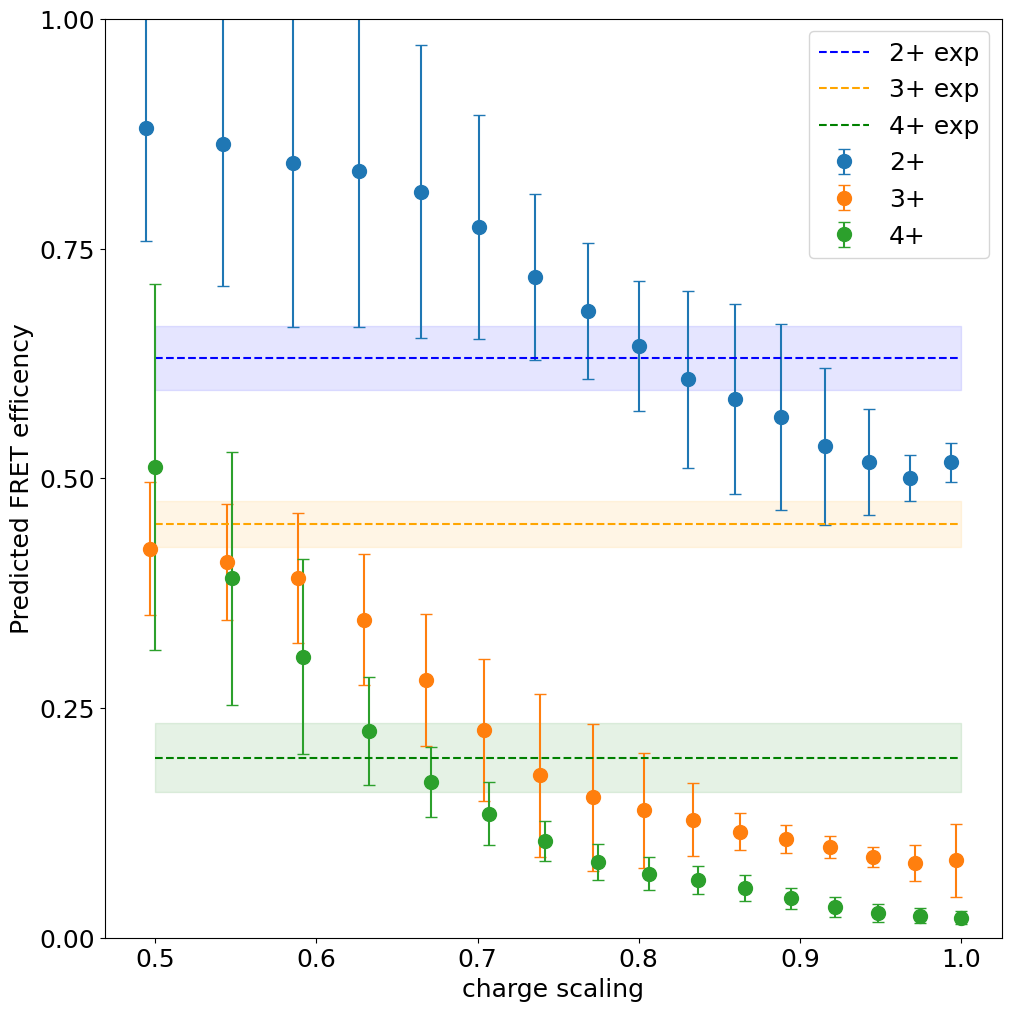

In [89]:
from cProfile import label
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams.update({'font.size': 18})

def get_efret(av1,s1,av2,s2):
    Efret = 1-(av2/av1)
    sefret = np.sqrt((1/av1)**2*s2**2+(s1/av1**2)**2*s2**2)
    return Efret,sefret

ref0, ref1, ref2 = get_efret(7.4,0.19,2.73,0.26), get_efret(6.84,0.06,3.76,0.17), get_efret(6.58,0.09,5.29,0.25)
refs = (ref0,ref1,ref2)

colors = ['blue','orange','green','red']

labels = ['2+','3+','4+','3+_2']
axd = plt.figure(constrained_layout=True).subplot_mosaic(
        [
            ["comp"]
        ],
        empty_sentinel="BLANK",
        gridspec_kw={"width_ratios": [1],"height_ratios":[1]}
    )
shift = 0.006

xs = np.sqrt(1-np.arange(16)/20) - shift
ran = 0
for i in range(3):
    #axd['comp'].scatter(xs +(shift/2)*i,efficiencies[:,i,ran])
    axd['comp'].errorbar(xs +(shift/2)*i,np.nanmean(efficiencies[:,i,:],axis=1),yerr=np.nanstd(efficiencies[:,i,:],axis=1),fmt='o',capsize=4,label = labels[i],markersize=10)
    axd['comp'].locator_params(nbins=4)
    ref = refs[i]
    axd['comp'].hlines(y=ref[0],xmin=0.5,xmax=1,linestyles='dashed',label='%s exp' % labels[i],color=colors[i])
    axd['comp'].fill_between(x=[0.5,1],y1=ref[0]-ref[1],y2=ref[0]+ref[1], alpha=0.1,color=colors[i])

#axd['comp'].set_ylim([0,0.4])
axd['comp'].set_xlabel('charge scaling')
axd['comp'].set_ylabel('Predicted FRET efficency')
axd['comp'].set_xticks(ticks=[0.5,0.6,0.7,0.8,0.9,1])
axd['comp'].legend()
axd['comp'].set_ylim([0,1])
plt.savefig('Visualisations/predeff.pdf')

## For $\lambda$=0.63

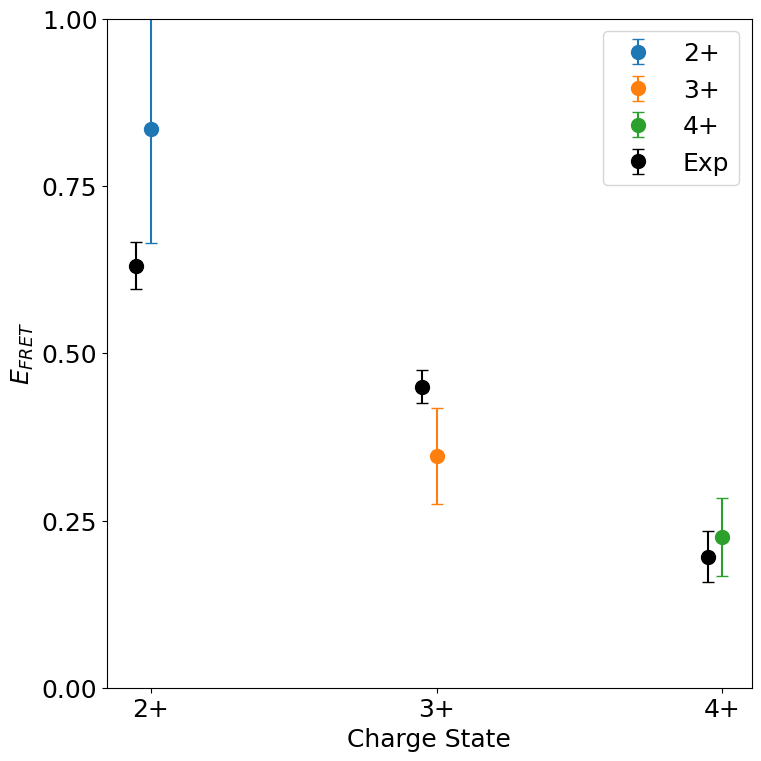

In [90]:
plt.rcParams["figure.figsize"] = (7.5,7.5)
labels = ['2+','3+','4+']
axd = plt.figure(constrained_layout=True).subplot_mosaic(
        [
            ["comp"]
        ],
        empty_sentinel="BLANK",
        gridspec_kw={"width_ratios": [1],"height_ratios":[1]}
    )
shift = 0.006

xs = np.sqrt(1-np.arange(16)/20) - shift
ran = 0
plot_data = []
for i in range(3):
    plot_data.append([np.nanmean(efficiencies[12,i,:]),np.nanstd(efficiencies[12,i,:])])
    axd['comp'].errorbar(1*i,np.nanmean(efficiencies[12,i,:]),yerr=np.nanstd(efficiencies[12,i,:]),fmt='o',capsize=4,label = labels[i],markersize=10)
    axd['comp'].locator_params(nbins=4)

for i in range(2):
    ref = refs[i]
    axd['comp'].errorbar(1*i-0.05,ref[0],yerr=ref[1],fmt='o',capsize=4,markersize=10,c='black')
i = 2
ref = refs[i]
axd['comp'].errorbar(1*i-0.05,ref[0],yerr=ref[1],fmt='o',capsize=4,markersize=10,c='black',label='Exp')
axd['comp'].set_ylim([0,1])
axd['comp'].set_xlabel('Charge State')
axd['comp'].set_ylabel('$E_{FRET}$')
axd['comp'].set_xticks(ticks=[0,1,2])
axd['comp'].set_xticklabels(['2+','3+','4+'])
axd['comp'].legend()
# plt.savefig('Visualisations/prevsexpEFRET.pdf')
# plt.savefig('Visualisations/prevsexpEFRET.png')

In [91]:
np.savetxt('Plotdata/comparison.txt',plot_data)

### SHAPE

In [92]:
def concatenate_shape(id,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    
    L_diss = []
    for ran in random_states:
        for it in chunks:
            #L_dis = np.load(shape_path + '/beta_id%i_r%i_beta__%i_shape_data2.npy' % (id,ran,it),allow_pickle=True)
            L_dis = np.load(data_path + '/beta_id%i_r%i_beta__%i_cu73_data2.npy' % (id,ran,it),allow_pickle=True)
            L_dis = L_dis[rep_indices]
            L_diss.append(L_dis)
    L_diss = np.concatenate(L_diss)
    return L_diss

def get_tot_ccs(ccs_val):
    ccs_val = np.array(ccs_val,dtype=np.float64)
    number = len(ccs_val)
    inv_ccs = 1 / ccs_val
    sum_d = np.sum(inv_ccs)
    CCS = number/sum_d
    return CCS

In [93]:
per_rep=1
replicas = 16
chunks = [10 + i for i in range(40)]
shapes = np.empty((16,3,5))
shs = [[[] for i in range(16)],[[] for i in range(16)],[[] for i in range(16)],[[] for i in range(16)]]
for replica in range(16):
    for id in range(3):
        for r,random in enumerate([[0],[1],[2],[3],[4]]):
            step_range = 500
            rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]
            shape = concatenate_shape(id,random,chunks,rep_indices,core='beta_id')
            shs[id][replica].append(shape)
            shapes[replica,id,r] = get_tot_ccs(shape)

In [94]:
import numpy as np
import scipy as sp

def test_statistical_significance_of_difference(arr1,arr2):
    '''This function tests the statistical significance of the difference between two arrays.'''
    # Compute the difference between the two arrays
    diff = np.mean(arr1) - np.mean(arr2)
    # Compute the standard error of the difference
    se = np.sqrt(np.std(arr1)**2/len(arr1) + np.std(arr2)**2/len(arr2))
    # Compute the t-statistic
    t = diff/se
    # Compute the p-value
    p = 2*sp.stats.t.cdf(-abs(t),df=len(arr1)+len(arr2)-2)
    return p

In [95]:
shapes[12]

array([[596.50443356, 607.05865502, 598.02499465, 618.57621987,
        618.39939506],
       [595.43392967, 598.6223535 , 588.98461736, 602.32388958,
        613.23682643],
       [640.98667401, 630.72586109, 621.88211246, 635.3469941 ,
        637.84019294]])

In [96]:
np.mean(shapes[12],axis=1), np.std(shapes[12],axis=1)

(array([607.71273963, 599.72032331, 633.35636692]),
 array([9.50921828, 8.05367624, 6.64630657]))

In [97]:
test_statistical_significance_of_difference(shapes[12,0,:],shapes[12,1,:]), test_statistical_significance_of_difference(shapes[12,0,:],shapes[12,2,:]), test_statistical_significance_of_difference(shapes[12,1,:],shapes[12,2,:])

(0.18943702723042252, 0.0011315414189734662, 9.218995516808003e-05)

In [99]:
data_path = '/fileserver/pine/pine8/kpaul/beta_project/preprocessed_data/'

In [100]:
import mdtraj
import numpy as np
from itertools import combinations
def best_hummer_q(traj, native):
    """Compute the fraction of native contacts according the definition from
    Best, Hummer and Eaton [1]
    
    Parameters
    ----------
    traj : md.Trajectory
        The trajectory to do the computation for
    native : md.Trajectory
        The 'native state'. This can be an entire trajecory, or just a single frame.
        Only the first conformation is used
        
    Returns
    -------
    q : np.array, shape=(len(traj),)
        The fraction of native contacts in each frame of `traj`
        
    References
    ----------
    ..[1] Best, Hummer, and Eaton, "Native contacts determine protein folding
          mechanisms in atomistic simulations" PNAS (2013)
    """
    
    BETA_CONST = 50  # 1/nm
    LAMBDA_CONST = 1.8
    NATIVE_CUTOFF = 0.45  # nanometers
    
    # get the indices of all of the heavy atoms
    heavy = native.topology.select_atom_indices('heavy')
    # get the pairs of heavy atoms which are farther than 3
    # residues apart
    heavy_pairs = np.array(
        [(i,j) for (i,j) in combinations(heavy, 2)
            if abs(native.topology.atom(i).residue.index - \
                   native.topology.atom(j).residue.index) > 3])
    heavy_pairs = mdtraj.baker_hubbard(native, periodic=False)[:,1:]
    # compute the distances between these pairs in the native state
    heavy_pairs_distances = mdtraj.compute_distances(native[0], heavy_pairs)[0]
    # and get the pairs s.t. the distance is less than NATIVE_CUTOFF
    native_contacts = heavy_pairs[heavy_pairs_distances < NATIVE_CUTOFF]
    print("Number of native contacts HBond", len(native_contacts))
    
    # now compute these distances for the whole trajectory
    r = mdtraj.compute_distances(traj, native_contacts)
    # and recompute them for just the native state
    r0 = mdtraj.compute_distances(native[0], native_contacts)
    
    q = np.mean(1.0 / (1 + np.exp(BETA_CONST * (r - LAMBDA_CONST * r0))), axis=1)
    return q  

def calculate_dssp_hummer_rmsd(traj,starting_struct):
    dssp = mdtraj.compute_dssp(traj,False)[:,6:18] #
    hummer = best_hummer_q(traj,starting_struct) # 
    rmsds = mdtraj.rmsd(traj,starting_struct,atom_indices=traj.topology.select_atom_indices('alpha')) #
    return dssp, hummer, rmsds

def concatenate_dssp(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_dssps = []
    
    for i in random_states:
        for s in chunks:
            L_dssp = np.load(data_path + '/%s%i_r%i_beta__%i_dssp.npy' % (core,id,i,s))
            L_dssp = L_dssp[rep_indices]
            L_dssps.append(L_dssp)

    L_dssps = np.concatenate(L_dssps)
    return L_dssps

def concatenate_rmsds(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_rmsds = []
    
    for i in random_states:
        for s in chunks:
            L_rmsd = np.load(data_path + '/%s%i_r%i_beta__%i_rmsds.npy' % (core,id,i,s))
            L_rmsd = L_rmsd[rep_indices]
            L_rmsds.append(L_rmsd)

    L_rmsds = np.concatenate(L_rmsds)
    return L_rmsds

def concatenate_hummer(linker,random_states=[],chunks=[0,1,2,3,4],rep_indices=[],core=''):
    id = linker
    L_hummers = []
    
    for i in random_states:
        for s in chunks:
            L_hummer = np.load(data_path + '/%s%i_r%i_beta__%i_hummer.npy' % (core,id,i,s))
            L_hummer = L_hummer[rep_indices]
            L_hummers.append(L_hummer)

    L_hummers = np.concatenate(L_hummers)
    return L_hummers

In [101]:
data_path

'/fileserver/pine/pine8/kpaul/beta_project/preprocessed_data/'

In [102]:
per_rep=10
replicas = 16
chunks = [10 + i for i in range(40)]


traj = mdtraj.load('/localhome/kpaul/Lrep/beta_data/beta_id0_r0_beta__0_output.h5')
starting_struct = traj[0]

startdssp, hummer, rmsds =  calculate_dssp_hummer_rmsd(starting_struct,starting_struct)
percentage = np.empty((16,5,3))
dssp_fraction = np.empty((16,5,3))
qs = np.empty((16,5,3))
backs = np.empty((16,5,3))

replica = 12
cut = 0
all_rep_dssp = [[],[],[]]
rep_indices = [replica*per_rep + j*replicas*per_rep + i for j in range(step_range) for i in range(per_rep)]
for i in range(3):
    for j in range(5):
        dssp = concatenate_dssp(i,[j],chunks,rep_indices,core='beta_id')
        percentage[replica,j,i] = np.mean(np.sum(dssp == startdssp,axis=1)/12>0.7)
        dssp_fraction[replica,j,i] = np.mean(np.sum(dssp == startdssp,axis=1)/12)
        all_rep_dssp[i].append(np.sum(dssp == startdssp,axis=1)/12)


/localhome/kpaul/.conda/envs/beta_publication/lib/python3.11/site-packages/mdtraj/core/trajectory.py:438: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


Number of native contacts HBond 13


In [103]:
len(rep_indices)

5000

In [104]:
all_rep_dssp = np.array(all_rep_dssp)
all_rep_dssp.shape

(3, 5, 200000)

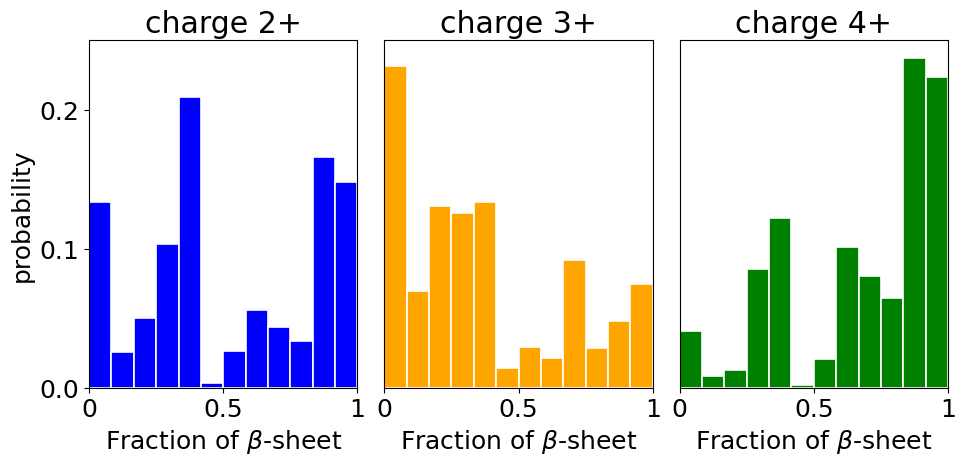

In [105]:
# plot histogram of all_rep_dssp with 12 replicas where all bars add up to 1
colors = ['blue','orange','green']
fig, ax = plt.subplots(1,3,figsize=(10,5))
for i in range(3):
    weights = np.ones_like(all_rep_dssp[i].flatten()) / len(all_rep_dssp[i].flatten())
    ax[i].hist(all_rep_dssp[i].flatten(),bins=12,weights=weights,edgecolor='white',linewidth=1.2,color=colors[i])
    ax[i].set_title('charge %i+' % (i+2))
    ax[i].set_ylabel('probability')
    ax[i].set_xlabel(r'Fraction of $\beta$-sheet')
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,0.25)
    ax[i].set_xticks([0,0.5,1],["0","0.5",'1'])
    ax[i].set_yticks([0,0.1,0.2])

fig.tight_layout()
fig.subplots_adjust(wspace=0.1)

ax[1].get_yaxis().set_visible(False)
ax[2].get_yaxis().set_visible(False)

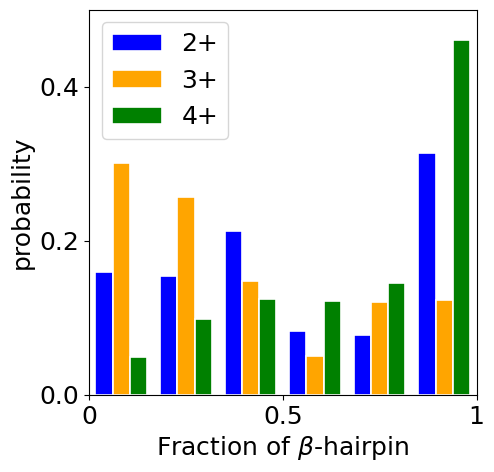

In [106]:
# Replot above figure in one plot with bars next to each other
colors = ['blue','orange','green']
fig, ax = plt.subplots(1,1,figsize=(5,5))
hist = plt.hist([all_rep_dssp[i].flatten()for i in range(3)],weights=[np.ones_like(all_rep_dssp[i].flatten()) / len(all_rep_dssp[i].flatten())for i in range(3)], bins =6,label=['2+','3+','4+'],color=colors,edgecolor='white',linewidth=1.2)
ax.set_ylabel('probability')
ax.set_xlabel(r'Fraction of $\beta$-hairpin')
ax.set_xlim(0,1)
ax.set_ylim(0,0.5)
ax.set_xticks([0,0.5,1],["0","0.5",'1'])
ax.set_yticks([0,0.2,0.4])
ax.legend()


In [107]:
np.savetxt('Plotdata/hist1.txt',hist[0])
np.savetxt('Plotdata/hist1delim.txt',hist[1])

In [108]:
percentage[12,:,:]

array([[0.22818 , 0.049715, 0.626705],
       [0.315925, 0.16002 , 0.509055],
       [0.302305, 0.24241 , 0.33584 ],
       [0.496335, 0.00644 , 0.471575],
       [0.396275, 0.29919 , 0.68503 ]])

In [109]:
np.mean(percentage[12,:,:],axis=0)

array([0.347804, 0.151555, 0.525641])

In [110]:
dssp_fraction[12]

array([[0.41647125, 0.29744042, 0.7529525 ],
       [0.46599292, 0.35168292, 0.6521925 ],
       [0.44658   , 0.38136583, 0.4774125 ],
       [0.61787458, 0.19459375, 0.64363917],
       [0.52211167, 0.44583125, 0.7622725 ]])

In [111]:
import mdtraj
import nglview

In [117]:
trajid2 = mdtraj.load('/fileserver/pine/pine8/kpaul/beta_project/trajectories/beta_id2_r1_beta__24_output.h5')
trajid1 = mdtraj.load('/fileserver/pine/pine8/kpaul/beta_project/trajectories/beta_id1_r1_beta__24_output.h5')
trajid0 = mdtraj.load('/fileserver/pine/pine8/kpaul/beta_project/trajectories/beta_id0_r1_beta__24_output.h5')

In [118]:
dssp = concatenate_dssp(2,[1],[24],rep_indices,core='beta_id')
id2_dsspid = np.where(np.sum(dssp == startdssp,axis=1) == 12)
dssp = concatenate_dssp(1,[1],[24],rep_indices,core='beta_id')
id1_dsspid = np.where(np.sum(dssp == startdssp,axis=1) == 0)
dssp = concatenate_dssp(0,[1],[24],rep_indices,core='beta_id')
id0_dsspid = np.where(np.sum(dssp == startdssp,axis=1) == 12)

In [119]:
np.random.seed(161311)
id0frame = np.random.choice(id0_dsspid[0])
id1frame = np.random.choice(id1_dsspid[0])
id2frame = np.random.choice(id2_dsspid[0])

trajid0[rep_indices][id0frame].save('Visualisations/id0frame.pdb')
trajid1[rep_indices][id1frame].save('Visualisations/id1frame.pdb')
trajid2[rep_indices][id2frame].save('Visualisations/id2frame.pdb')